# Lecture : Introduction to Graph Science

## Lab 04 : Construct a network of text documents

### Xavier Bresson  


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/GML2023_codes/codes/02_Graph_Science'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd
    

In [2]:
# Load libraries
import numpy as np
%matplotlib inline
#%matplotlib notebook 
import matplotlib.pyplot as plt
import pylab # 3D visualization
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import scipy.io # import data
import sys; sys.path.insert(0, 'lib/')
%load_ext autoreload
%autoreload 2
from lib.utils import compute_ncut
from lib.utils import reindex_W_with_classes
from lib.utils import nldr_visualization
from lib.utils import construct_knn_graph
import warnings; warnings.filterwarnings("ignore")


In [3]:
# Load 10 classes of 4,000 text documents
mat = scipy.io.loadmat('datasets/20news_5classes_raw_data.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt']-1; Cgt=Cgt.squeeze()
nc = len(np.unique(Cgt))
print(n,d,nc)


2000 7939 5


In [4]:
# Compute the k-NN graph with L2/Euclidean distance
W_euclidean = construct_knn_graph(X, 10, 'euclidean')
#print(W_euclidean)


k-NN graph with euclidean distance


In [5]:
Cncut,acc = compute_ncut(W_euclidean, Cgt, nc)
print(acc)


20.349999999999998


In [6]:
[reindexed_W_gt,reindexed_C_gt] = reindex_W_with_classes(W_euclidean,Cgt)
[reindexed_W_ncut,reindexed_C_ncut] = reindex_W_with_classes(W_euclidean,Cncut)


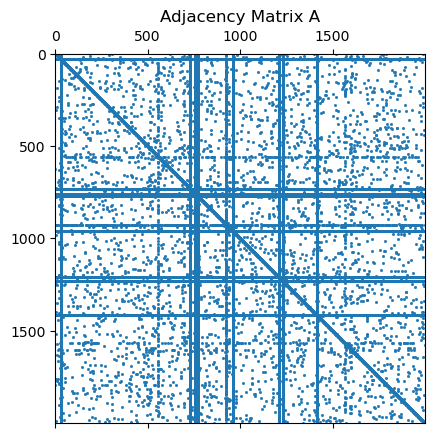

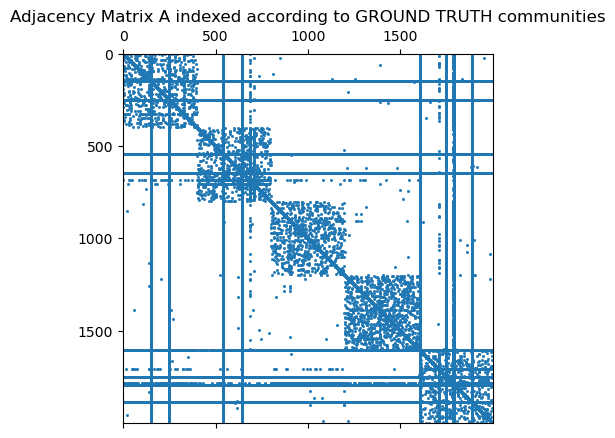

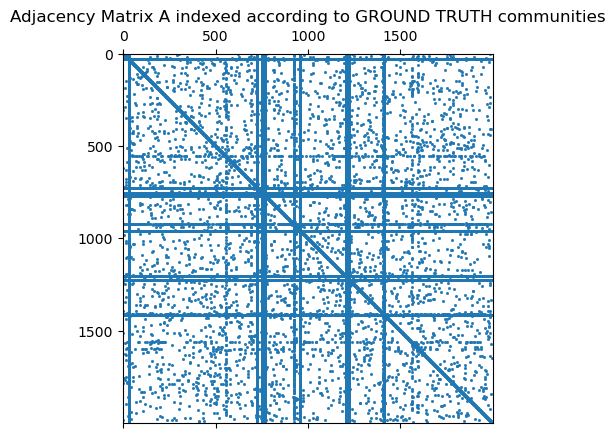

In [7]:
plt.figure(1)
plt.spy(W_euclidean,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A')
plt.show()

plt.figure(2)
plt.spy(reindexed_W_gt,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A indexed according to GROUND TRUTH communities')
plt.show()

plt.figure(3)
plt.spy(reindexed_W_ncut,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A indexed according to GROUND TRUTH communities')
plt.show()


In [ ]:
# Visualization
[X,Y,Z] = nldr_visualization(W_euclidean)

plt.figure(4)
size_vertex_plot = 10
plt.scatter(X, Y, s=size_vertex_plot*np.ones(n), c=Cncut, color=pyplot.jet())
plt.title('Clustering result with EUCLIDEAN distance, ACCURACY= '+ str(acc))
plt.show()

# 3D Visualization
fig = pylab.figure(5)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Cncut, color=pyplot.jet())
pyplot.show()


In [ ]:
# Compute the k-NN graph with Cosine distance
X = mat['X']
W_cosine = construct_knn_graph(X,10,'cosine')

Cncut, acc = compute_ncut(W_cosine, Cgt, nc)
print(acc)


In [ ]:
[reindexed_W_gt,reindexed_C_gt] = reindex_W_with_classes(W_cosine,Cgt)
[reindexed_W_ncut,reindexed_C_ncut] = reindex_W_with_classes(W_cosine,Cncut)


In [ ]:
plt.figure(6)
plt.spy(W_cosine,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A')
plt.show()

plt.figure(7)
plt.spy(reindexed_W_gt,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A indexed according to GROUND TRUTH communities')
plt.show()

plt.figure(8)
plt.spy(reindexed_W_ncut,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A indexed according to NCUT communities')
plt.show()


In [ ]:
# Visualization
[X,Y,Z] = nldr_visualization(W_cosine)

plt.figure(9)
size_vertex_plot = 10
plt.scatter(X, Y, s=size_vertex_plot*np.ones(n), c=Cncut, color=pyplot.jet())
plt.title('Clustering result with EUCLIDEAN distance, ACCURACY= '+ str(acc))
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Cncut, s=5)
ax.set_box_aspect((1, 1, 1), zoom=2)
#ax.set_axis_off()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])
plt.show()
